# Keras livelossplot

<a href="https://colab.research.google.com/github/stared/livelossplot/blob/master/examples/keras.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>

In [5]:
!pip install livelossplot keras tensorflow

    100% |████████████████████████████████| 109.2MB 317kB/s 
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
    100% |████████████████████████████████| 61kB 16.0MB/s 
    100% |████████████████████████████████| 491kB 10.8MB/s 
    100% |████████████████████████████████| 2.7MB 8.7MB/s 
  Using cached https://files.pythonhosted.org/packages/1a/53/9243c600e047bd4c3df9e69cfabc1e8004a82cac2e0c484580a78a94ba2a/absl-py-0.9.0.tar.gz
    100% |████████████████████████████████| 3.2MB 6.0MB/s 
    100% |████████████████████████████████| 1.3MB 5.8MB/s 
  Using cached https://files.pythonhosted.org/packages/ab/c4/ba46d44855e6eb1770a12edace5a165a0c6de13349f592b9036257f3c3d3/Markdown-3.2.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 583kB 10.7MB/s 
  Using cached https://files.pythonhosted.org/packages/ba/a5/d6f8a6e71f15364d35678a4ec8a0186f980b3bd2545f40ad51dd26a87fb1/Werkzeug-1.0.0-

In [20]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

# raw keras
from livelossplot.input_plugins.keras import PlotLossesCallback

# tensorflow.keras
# from livelossplot.tf_keras import PlotLossesCallback

In [21]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [23]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

In [24]:
group_patterns = {'acccuracy': r'.*accuracy$', 'Mean squared error': r'.*mean_squared_error$'}
plot_losses = PlotLossesCallback(group_patterns=group_patterns)

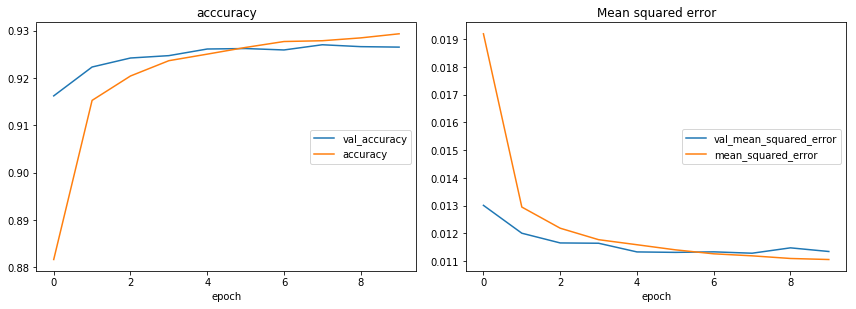

acccuracy
	val_accuracy     	 (min:    0.916, max:    0.928, cur:    0.927)
	accuracy         	 (min:    0.879, max:    0.929, cur:    0.929)
Mean squared error
	val_mean_squared_error 	 (min:    0.011, max:    0.013, cur:    0.011)
	mean_squared_error 	 (min:    0.011, max:    0.019, cur:    0.011)


In [25]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=False)